In [8]:
import pandas as pd
train = pd.read_csv("hate_speech_labeled.csv", index_col = 0)

In [9]:
train = train.drop(['contain_gender_bias','bias','hate'], axis = 1)
train.head()
#1이 부정문장, 0이 긍정문장

comments  label
0    현재 호텔주인 심정 아 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네      1
1    한국적인 미인의 대표적인 분너무나 곱고아름다운모습그모습뒤의 슬픔을 미처 알지못했네요ㅠ      0
2  못된 넘들남의 고통을 즐겼던 넘들이젠 마땅한 처벌을 받아야지그래야 공정한 사회지심은...      1
3                       화 어설펐는데 화 지나서부터는 갈수록 너무 재밌던데      0
4       사람 얼굴 손톱으로 긁은것은 인격살해이고 동영상이 몰카냐 메걸리안들 생각이 없노      1

In [16]:
X_train_text = train.comments
y_train = train.label
print(X_train_text.head(),y_train.head())

0      현재 호텔주인 심정 아 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네
1      한국적인 미인의 대표적인 분너무나 곱고아름다운모습그모습뒤의 슬픔을 미처 알지못했네요ㅠ
2    못된 넘들남의 고통을 즐겼던 넘들이젠 마땅한 처벌을 받아야지그래야 공정한 사회지심은...
3                         화 어설펐는데 화 지나서부터는 갈수록 너무 재밌던데
4         사람 얼굴 손톱으로 긁은것은 인격살해이고 동영상이 몰카냐 메걸리안들 생각이 없노
Name: comments, dtype: object 0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64


(array([3273., 4623.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

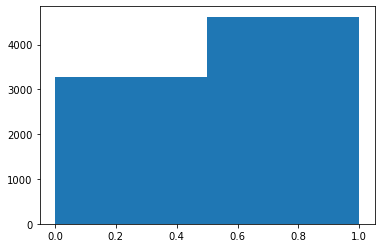

In [17]:
from matplotlib import pyplot as plt
plt.hist(y_train, bins = 2)
#일반 문장 약 3000개, 악성 문장 약 5000개

In [24]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
#벡터화
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_train[0]

<1x36666 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [26]:
#TP(11): 일반->일반
#FN(12): 일반->악성
#FP(21): 악성->일반
#TN(22): 악성->악성

pred = clf.predict(X_train)
print("정확도: ", sklearn.metrics.accuracy_score(y_train, pred))
print("Confusion Matrix: \n", confusion_matrix(y_train,pred,normalize = 'pred'))

정확도:  0.9682117527862208
Confusion Matrix: 
 [[0.99638633 0.04946414]
 [0.00361367 0.95053586]]


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(y_train, pred)
print(p)
r = recall_score(y_train, pred)
print(r)
f1 = f1_score(y_train, pred)
print(f1)

0.9505358615004122
0.9976205926887303
0.973509234828496


In [50]:
#함수만들다실패
text = []

def clf_txt(text):
    for i in range(len(text)):
        subject = vectorizer.fit_transform(text[i])
        predict = clf.predict(subject)
        print(predict)

text.append('노잼이다')
text

['노잼이다']

In [51]:
clf_txt(text)

ValueError: Iterable over raw text documents expected, string object received.

In [34]:
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer #대리분석

In [52]:
#비속어필터링함수
def filter_toxic(text):
    pipe = make_pipeline(vectorizer, clf)
    pred = clf.predict(vectorizer.transform([text])[0])
    
    explainer = LimeTextExplainer(class_names=[0,1])
    exp = explainer.explain_instance(text, pipe.predict_proba)
    
    result = exp.as_list()
    toxic_list = [x[0] for x in result if x[1] >= 0.1]
    
    filtered = text
    for toxic in toxic_list:
        filtered = filtered.replace(toxic, "*"*len(toxic))
    
    print("origin txt: \n{}\n\nFiltered: \n{}".format(text, filtered))

In [53]:
sample = '존나 뭐하자는거지'
filter_toxic(sample)

origin txt: 
존나 뭐하자는거지

Filtered: 
** 뭐하자는거지


In [ ]:
#함수만들다실패2
def txt_classifier(text):
    pipe = make_pipeline(vectorizer, clf)
    pred = clf.predict(vectorizer.transform([text])[0])
    
    explainer = LimeTextExplainer(class_names=[0,1])
    exp = explainer.explain_instance(text, pipe.predict_proba)
    
    result = exp.as_list()
    toxic_list = [x[0] for x in result if x[1] >= 0.1]
    
    